<a href="https://colab.research.google.com/github/sarthak-314/100-Days-in-Data/blob/master/4.2%20Data%20Exploration%20(Health).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Health**: Analyzing health data from *df_smartwatch* and *df_exercise*
***

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)

DF_PATH = './100D Data/Final Dataframes'
%cd /content/drive/My\ Drive/

In [ ]:
#Loading the dataframes
df_exercise = pd.read_csv(os.path.join(DF_PATH, 'df_exercise'))
df_smartwatch = pd.read_csv(os.path.join(DF_PATH, 'df_smartwatch'))
df_date = pd.read_csv(os.path.join(DF_PATH, 'df_date'))
df_code = pd.read_csv(os.path.join(DF_PATH, 'df_code'))

Let's take a look at the dataframes

In [ ]:
df_smartwatch.head(3)

,date,sleep,deep_sleep,sleep_start,wakeup_time,sleep_duration(hr),steps_walked,km_walked,avg_heart_rate,stress,calories,week
0,23rd August,7:54 PM - 4:50 AM,48,7:54 PM,4:50 AM,8.93,6893,5.40,54,40,3133,1
1,24th August,5:55 PM - 12:23 AM,48,5:55 PM,12:23 AM,6.47,17430,14.62,55,38,3607,1
2,25th August,9:59 PM - 5:48 AM,77,9:59 PM,5:48 AM,7.82,7339,5.94,51,22,2670,1


In [ ]:
df_exercise.head()

,duration(min),activity,measurement,bpm,date,speed
0,32,Cycling,9.21,121.0,23rd August,17.27
1,49,Walking,4.31,109.0,23rd August,5.28
2,30,Workout,NaN,NaN,23rd August,NaN
3,30,Cycling,9.21,121.0,24th August,18.42
4,52,Walking,4.30,109.0,24th August,4.96


### **SLEEP**

When do I wake up and when do I go to sleep?

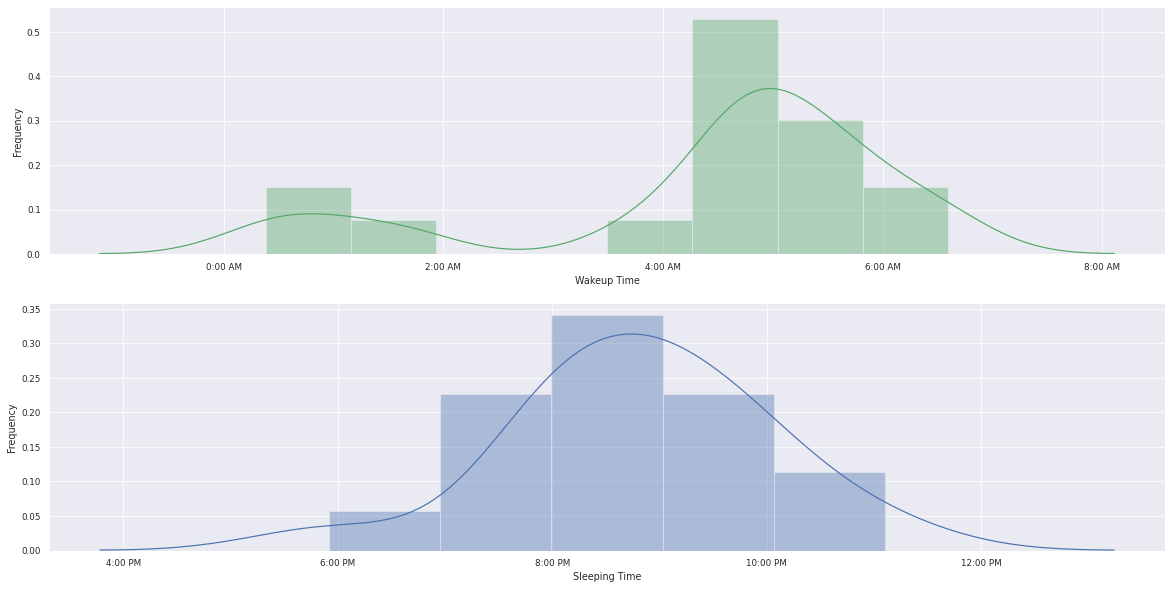

In [ ]:
#Get 12:30 PM as 12.5 or 6:20 AM as 6.33
def get_hr(x): 
    time = x.split(' ')[0]
    hour, min = time.split(':')
    if int(hour) >= 12: 
        hour = int(hour)- 12
    hr =  round(int(hour) + int(min)/60, 2)
    return hr

wakeup_hr = df_smartwatch['wakeup_time'].apply(get_hr)
sleeping_hr = df_smartwatch['sleep_start'].apply(get_hr)
_, ax = plt.subplots(2, figsize=(20, 10))

g = sns.distplot(wakeup_hr, ax=ax[0], color='g')
f = sns.distplot(sleeping_hr, ax=ax[1], )
plt.draw()

g.set_xticklabels([str(x.get_text())+':00 AM' for x in g.get_xticklabels()])
g.set_xlabel('Wakeup Time')
g.set_ylabel('Frequency')

f.set_xticklabels([str(x.get_text())+':00 PM' for x in f.get_xticklabels()])
f.set_xlabel('Sleeping Time')
_= f.set_ylabel('Frequency')

I usually wake up around 4 AM to 6 AM and sleep between 7:00 PM to 11:00 PM

I wake up pretty early no matter how late I slept. This means many days, I miss out on some sleep. Let's see how many hours of sleep I get

How many hours do I sleep?

In [ ]:
df_smartwatch['sleep_duration(hr)'].describe()

count    17.000000
mean      7.605882
std       1.520724
min       5.000000
25%       6.470000
50%       7.820000
75%       8.930000
max       9.750000
Name: sleep_duration(hr), dtype: float64

Distribution of amount of sleep

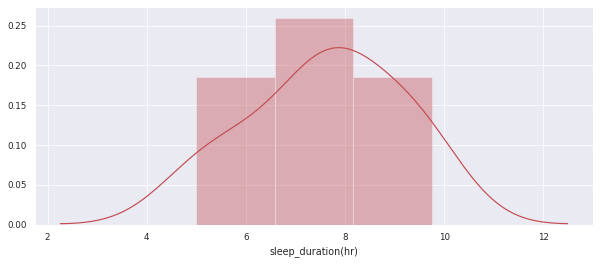

In [ ]:
plt.figure(figsize=(10, 4))

_ = sns.distplot(df_smartwatch['sleep_duration(hr)'], color='r')

There is a lot of variation in the amount of sleep I get a night, altough on average the lows and highs balance out and I get a decent 7.6 hours of sleep.




Over the 100 days how did my sleep pattern change?

Average sleep for 17 days is 7.61 hrs/day



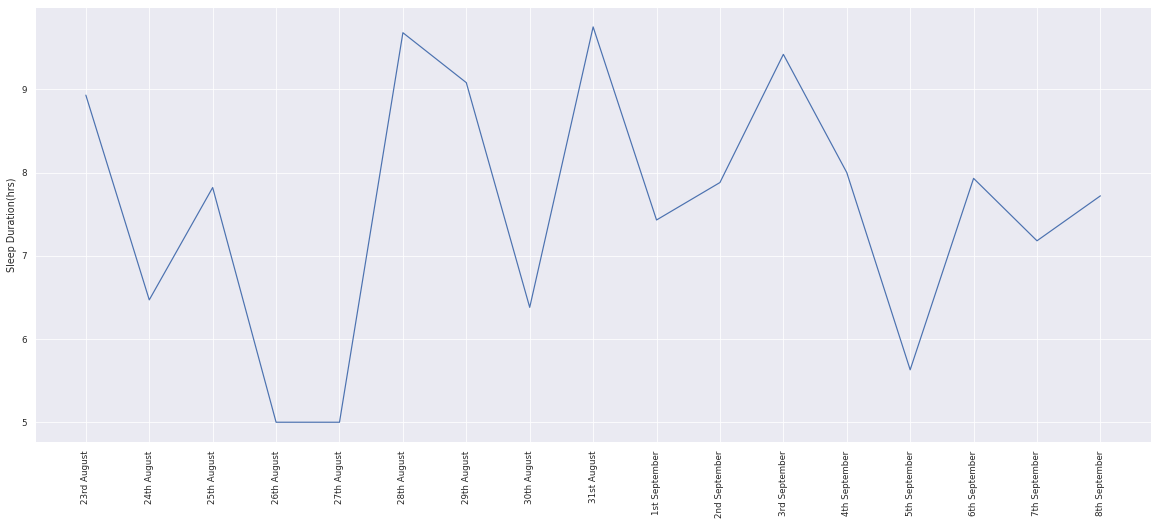

In [ ]:
TOTAL_DAYS = df_smartwatch.date.nunique()
avg_sleep = round(df_smartwatch['sleep_duration(hr)'].sum() / TOTAL_DAYS, 2)
print('Average sleep for\x1b[32m', TOTAL_DAYS, 'days \x1b[0mis\x1b[32m', avg_sleep, 'hrs/day')
print('')
plt.subplots(figsize=(20, 8))
g = sns.lineplot(y='sleep_duration(hr)', x='date', data=df_smartwatch, sort=False)
plt.draw()
g.set_ylabel('Sleep Duration(hrs)')
g.set_xlabel('')
_ = g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)

As before, there is a lot of variation day to day, but on average it balances out

**df_smartwatch variables**

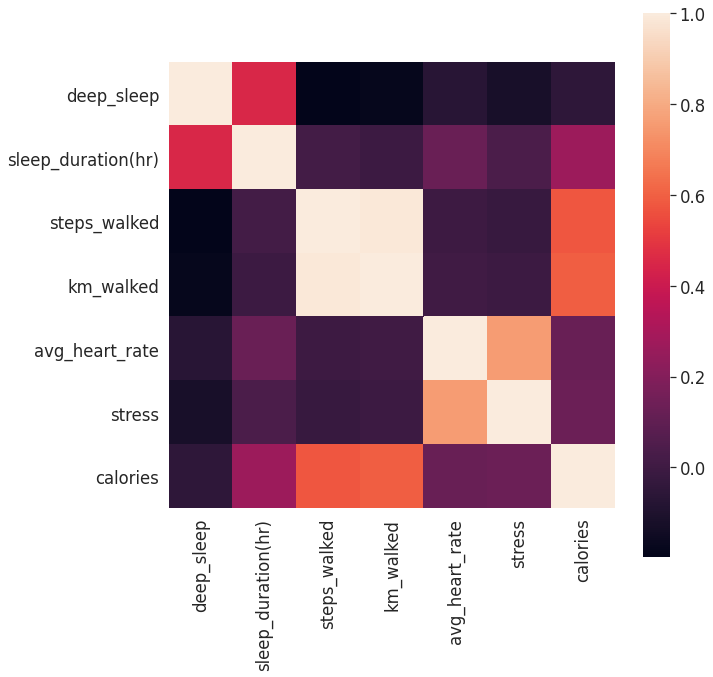

In [ ]:
#Let's see how the numerical values in df_smartwatch are correlated
plt.subplots(figsize=(10, 10))
_ = sns.heatmap(df_smartwatch.drop('week', axis=1).corr(), square=True)

Steps walked and km walked are higly correlated. No surprise there. 
Similarly km_walked and calories are correlated

Let's take a look at all the variables individually


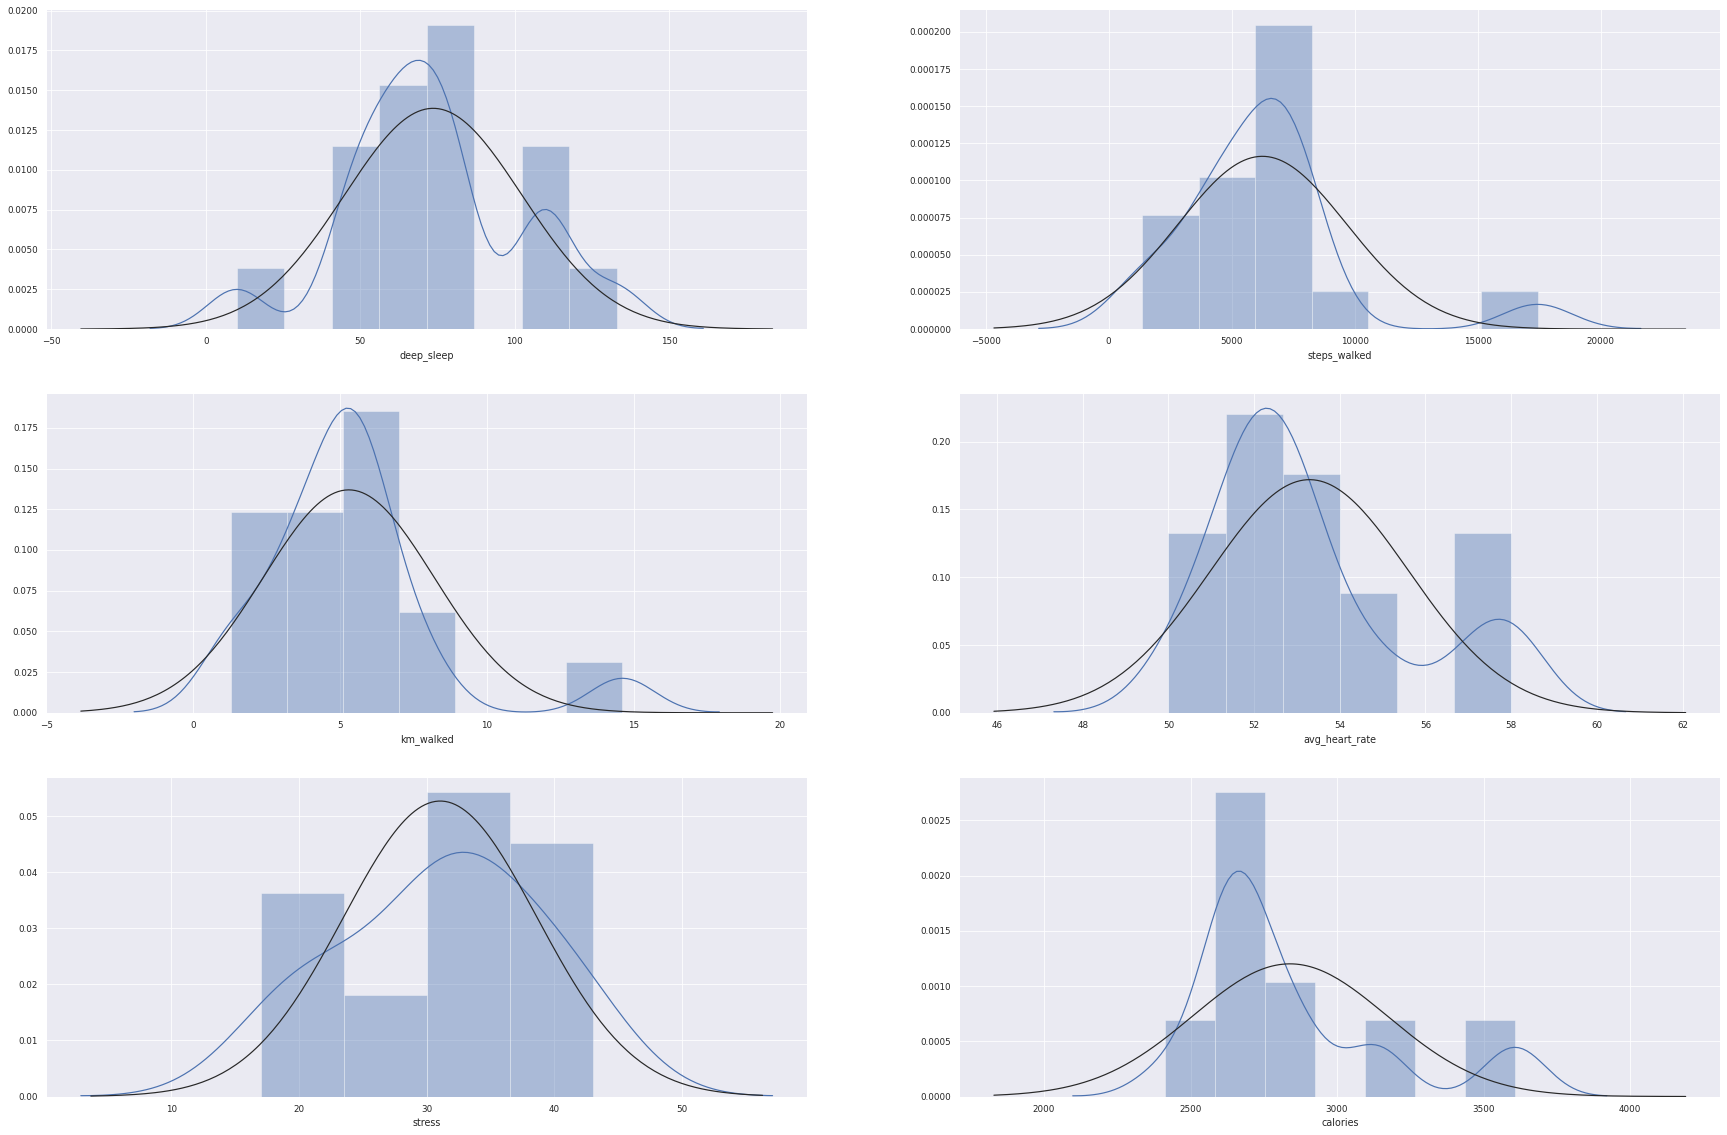

In [ ]:
from scipy.stats import norm
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
ax=ax.ravel()
for i, x in enumerate(['deep_sleep', 'steps_walked', 'km_walked', 'avg_heart_rate', 'stress', 'calories']):
    g = sns.distplot(df_smartwatch[x], ax=ax[i], fit=norm)
    g.set_xlabel(x)

All of the data looks pretty noisy. Can't think of an sexy insight. Gotta wait

### **Cycling and Walking**

Most of my time exercising is either walking or cycling. I gave up on workouts after the first day my body starting hurting like bitch

In [ ]:
TOTAL_DAYS = int(df_date.iloc[-1].day_number - df_date.iloc[0].day_number + 1)
NUM_DAYS = df_exercise.date.nunique()
import re
def extract_measurement(x):
    s = re.findall(r'\d+.\d+', x)
    return float(s[0]) if s else None
df_exercise.measurement = df_exercise.measurement.apply(extract_measurement)


Total distance walked over 17 days is: 30.87 kms
Total time spent walking is : 6.45 hours
Total distance cycled over 17 days is: 30.87 kms
Total time spent cycling is : 2.55 hours
----------------------------------------------------------------------------------------------------



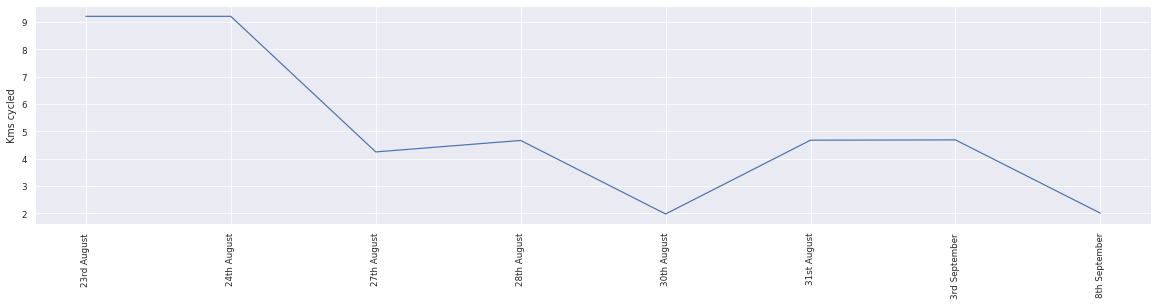

In [ ]:
for activity in ['Walking', 'Cycling']:
    df = df_exercise[df_exercise.activity == activity]
    print('\x1b[0mTotal distance', activity.lower()[:4]+'ed over\x1b[32m', TOTAL_DAYS, '\x1b[0mdays is:\x1b[32m', total_distance, 'kms')
    total_time = round(float(df['duration(min)'].sum()) / 60, 2)
    print('\x1b[0mTotal time spent', activity.lower(), 'is :\x1b[32m', total_time, 'hours')

print('-'*100+'\n')
plt.figure(figsize=(20, 4))
g = sns.lineplot(x='date', y='measurement' ,data=df, sort=False)
g.set_ylabel('Kms cycled')
g.set_xlabel('')
plt.draw()
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

How do wakeup time and sleeping time corrospond to total sleep duration?

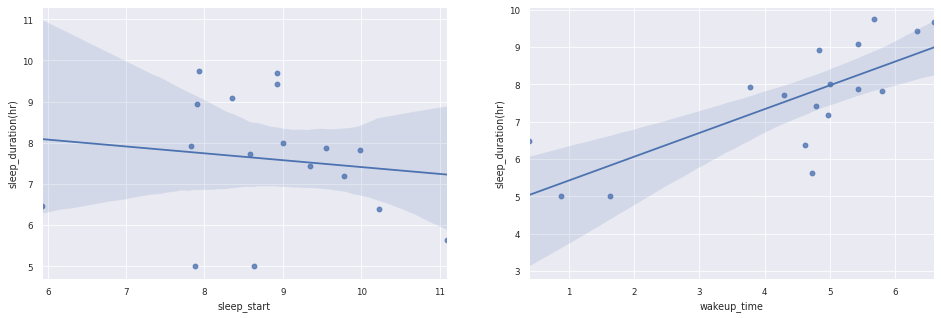

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.regplot(sleeping_hr, df_smartwatch['sleep_duration(hr)'], ax=ax[0])
_ = sns.regplot(wakeup_hr, df_smartwatch['sleep_duration(hr)'], ax=ax[1])

* The first graph has a line with slightly negative slope, which means, going to bed later has a slight negative impace on my sleep duration
* The second graph has a much steeper positive line of slope, which means the later I wake up, the longer I sleep and the effect is much more pronounced. 1 hour of sleep in the morning is more precious or something.?
TODO: Complete this